In [ ]:
%matplotlib inline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
# Write your imports here

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [22]:
income_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)

In [23]:
nose.tools.assert_is_not_none(income_data)

In [24]:
columns_names = ["age", "workclass", "postcode", "education", "education-num", "marital-status", "occupation", 
                 "relationship", "race", "sex", "capital-gain","capital-loss", "hours-per-week", "native-country", "target"]

In [25]:
income_data.columns = columns_names

In [26]:
income_data

,age,workclass,postcode,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [38]:
def get_num_people_with_high_income(dataframe):
    return dataframe.loc[dataframe.target == " >50K"].shape[0]

In [39]:
get_num_people_with_high_income(income_data)

7841

In [33]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

<function matplotlib.pyplot.show(close=None, block=None)>

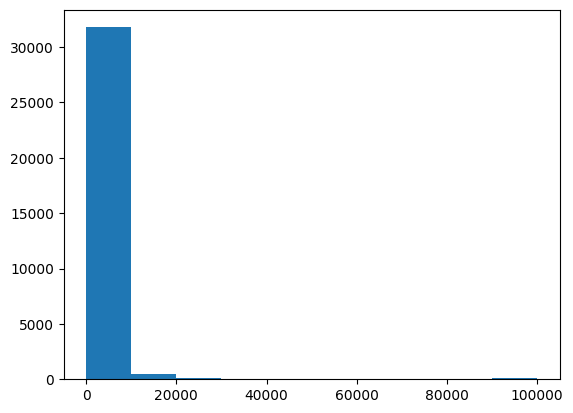

In [42]:
# YOUR CODE HERE
plt.hist(income_data["capital-gain"])
plt.show

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [43]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    # YOUR CODE HERE
    return dataframe.loc[dataframe["capital-gain"] >= threshold_gain].shape[0]

In [44]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

In [56]:
income_data["marital-status"].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

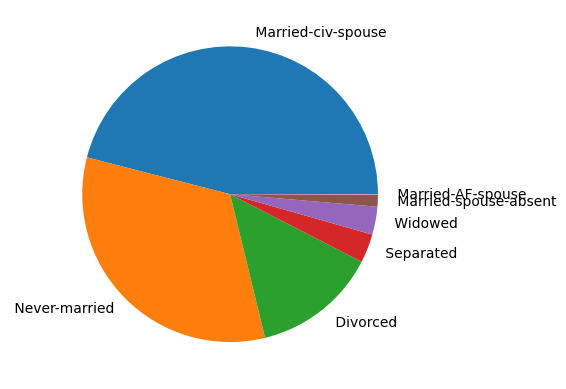

In [54]:
# YOUR CODE HERE
plt.pie(income_data["marital-status"].value_counts(), labels = income_data["marital-status"].value_counts().index)
plt.show

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [57]:
def most_prominent_marital_status(dataframe):
    status = income_data["marital-status"].value_counts().index[0]
    num_people = income_data["marital-status"].value_counts()[0]
    
    return (status, num_people)

In [59]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

C:\Users\Цецо\AppData\Local\Temp\ipykernel_7872\1175892616.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_people = income_data["marital-status"].value_counts()[0]


### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

Text(0, 0.5, 'Count')

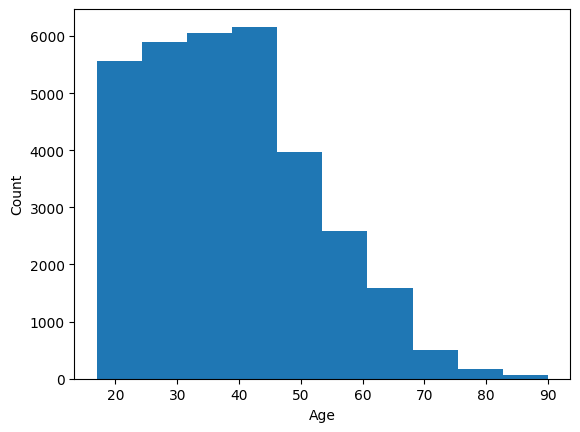

In [65]:
# YOUR CODE HERE
plt.hist(income_data.age)
plt.xlabel("Age")
plt.ylabel("Count")

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [66]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (0, 0, 0)
    # YOUR CODE HERE
    young = dataframe.loc[dataframe.age <= 30].shape[0]
    middle_aged = dataframe.loc[(dataframe.age > 30) & (dataframe.age <= 60)].shape[0]
    old = dataframe.loc[dataframe.age > 60].shape[0]
    
    return young, middle_aged, old

In [67]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

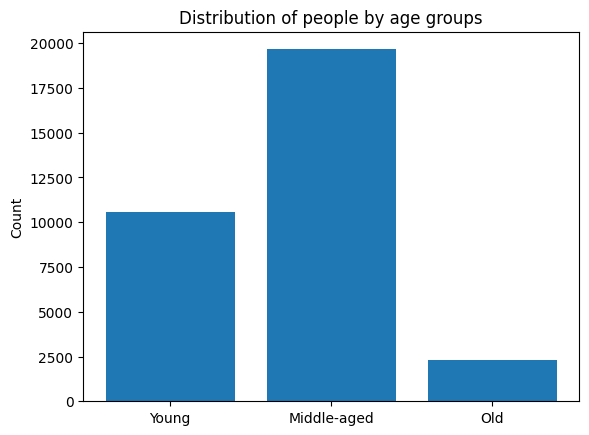

In [68]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [70]:
def get_second_highest_num_people(dataframe):
    num_people, country = 0, ""

    num_people = dataframe["native-country"].value_counts()[1]
    country = dataframe["native-country"].value_counts().index[1]
    
    return num_people, country

In [71]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

C:\Users\Цецо\AppData\Local\Temp\ipykernel_7872\3810419551.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_people = dataframe["native-country"].value_counts()[1]


### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [73]:
def get_mean_working_hours_by_income(dataframe):
    return dataframe.groupby(["occupation"]).agg({"hours-per-week": "mean"})

In [74]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

                    hours-per-week
occupation                        
 ?                       31.906131
 Adm-clerical            37.558355
 Armed-Forces            40.666667
 Craft-repair            42.304221
 Exec-managerial         44.987703
 Farming-fishing         46.989940
 Handlers-cleaners       37.947445
 Machine-op-inspct       40.755744
 Other-service           34.701669
 Priv-house-serv         32.885906
 Prof-specialty          42.386715
 Protective-serv         42.870570
 Sales                   40.781096
 Tech-support            39.432112
 Transport-moving        44.656230


KeyError: 'Handlers-cleaners'